In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

beer_path = "output_data/craft_beer_nv.csv"
beer_df = pd.read_csv(beer_path)

census_path ="output_data/census_data_state.csv"
census_df = pd.read_csv(census_path)

beer_df.head()

,Name,id,Alcohol By Volume,International Bitterness Units,Standard Reference Method,Style,Category,Brewer,City,State,Latitude,Longitude,Region
0,Possession Porter,723,5.6,0,0,Porter,Irish Ale,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,47.9485,-122.3050,West
1,Free Bike Amber,742,4.5,0,0,American-Style Amber/Red Ale,North American Ale,Skagit River Brewing,Mount Vernon,Washington,48.4192,-122.3350,West
2,Potrero ESB,3982,5.2,0,0,Special Bitter or Best Bitter,British Ale,21st Amendment Brewery Cafe,San Francisco,California,37.7825,-122.3930,West
3,Twisted Kilt Scotch Ale,4221,5.0,0,0,Scotch Ale,British Ale,Thirsty Dog Brewing,Akron,Ohio,41.0689,-81.5172,Midwest
4,HarvestÃ¶r Fresh Hop Ale,5243,7.2,0,0,American-Style Pale Ale,North American Ale,Lift Bridge Brewery,Stillwater,Minnesota,45.0565,-92.8222,Midwest


In [6]:
bps = beer_df.groupby(['State']).count()['Name']
pps = census_df[['Name','Median Age']]
pps = pps.rename(columns = {"Name":"State"})
pps.index = pps["State"]
pps["Breweries"] = bps
pps["Breweries"] = pps["Breweries"].fillna(0)


corr_df = pd.DataFrame({"Breweries":bps,
                        "Population":""
})
pps

,State,Median Age,Breweries
State,,,
Minnesota,Minnesota,37.9,28.0
Mississippi,Mississippi,37.2,0.0
Missouri,Missouri,38.5,43.0
Montana,Montana,39.8,5.0
Nebraska,Nebraska,36.4,27.0
Nevada,Nevada,37.9,0.0
New Hampshire,New Hampshire,42.7,18.0
New Jersey,New Jersey,39.8,33.0
New Mexico,New Mexico,37.5,12.0


The correlation between median age and number of breweries is 0.04


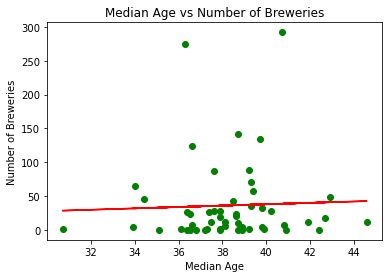

In [16]:
corr=round(st.pearsonr(pps['Median Age'],pps['Breweries'])[0],2)
print(f"The correlation between median age and number of breweries is {corr}")
model = st.linregress(pps['Median Age'],pps['Breweries'])

y_values = pps['Median Age']*model[0]+model[1]
plt.scatter(pps['Median Age'],pps['Breweries'],color="g")
plt.plot(pps['Median Age'],y_values,color="red")
plt.xlabel('Median Age')
plt.ylabel('Number of Breweries')
plt.title("Median Age vs Number of Breweries")
plt.savefig("./Images/med_age_v_brew.png")
plt.show()